In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
survey = pd.read_excel("smmh dataset.xlsx")

In [3]:
survey

,Age,Gender,Relationship Status,Occupation Status,Occupation Status.1,Social Media usage,Apps used,Time spend,Purposeless usage,Lose focus,...,Easily distracted,bothered by worries,difficulty in concentration,comparision frequency,Emotional_Comparision,validation from features,depressed_feeling,Fluctuation in interset,Sleeping_issues,Total
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,...,4,3,4,4,2,4,3,4,4,42
477,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,...,3,4,4,4,2,4,4,4,1,35
478,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,...,3,2,3,3,3,4,2,2,2,34
479,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,...,3,3,2,2,3,4,4,5,4,37


In [4]:
survey.shape

(481, 21)

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          481 non-null    float64
 1   Gender                       481 non-null    object 
 2   Relationship Status          481 non-null    object 
 3   Occupation Status            481 non-null    object 
 4   Occupation Status.1          451 non-null    object 
 5   Social Media usage           481 non-null    object 
 6   Apps used                    481 non-null    object 
 7   Time spend                   481 non-null    object 
 8   Purposeless usage            481 non-null    int64  
 9   Lose focus                   481 non-null    int64  
 10  Restless without usage       481 non-null    int64  
 11  Easily distracted            481 non-null    int64  
 12  bothered by worries          481 non-null    int64  
 13  difficulty in concen

In [6]:
survey.describe()

,Age,Purposeless usage,Lose focus,Restless without usage,Easily distracted,bothered by worries,difficulty in concentration,comparision frequency,Emotional_Comparision,validation from features,depressed_feeling,Fluctuation in interset,Sleeping_issues,Total
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663,37.305613
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619,9.332077
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,32.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,38.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,44.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,60.000000


In [7]:
survey.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation Status',
       'Occupation Status.1', 'Social Media usage', 'Apps used', 'Time spend',
       'Purposeless usage', 'Lose focus', 'Restless without usage',
       'Easily distracted', 'bothered by worries',
       'difficulty in concentration', 'comparision frequency',
       'Emotional_Comparision', 'validation from features',
       'depressed_feeling', 'Fluctuation in interset', 'Sleeping_issues',
       'Total'],
      dtype='object')

In [8]:
#survey.head()

In [9]:
#survey.tail()

# Data Analysis and Visualization

<Axes: ylabel='Age'>

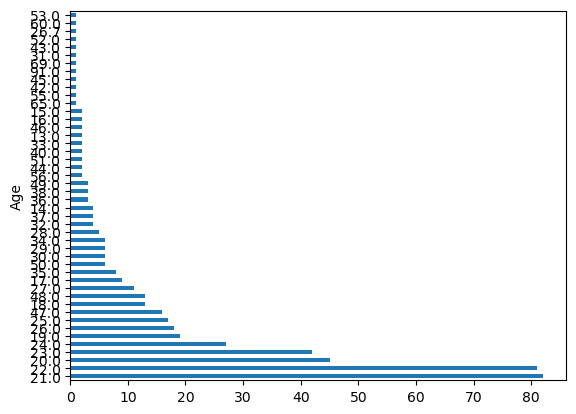

In [10]:
survey['Age'].value_counts().plot(kind ="barh")

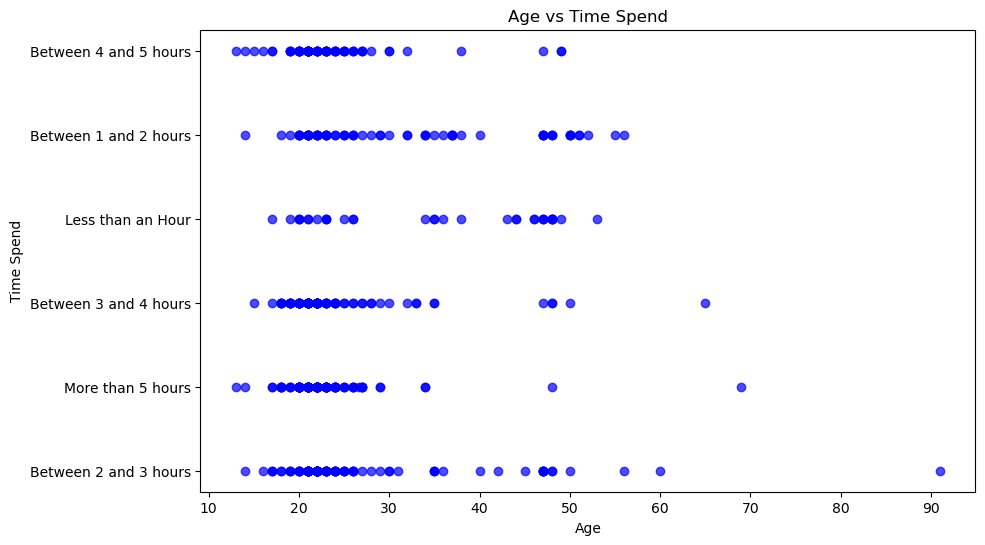

In [11]:
# Scatter plot for Age vs. Time Spend
plt.figure(figsize=(10, 6))
plt.scatter(survey['Age'], survey['Time spend'], alpha=0.7, color='blue')
plt.title('Age vs Time Spend')
plt.xlabel('Age')
plt.ylabel('Time Spend')
plt.show()

In [12]:
# sns.histplot(survey['Total'], kde=True)
# plt.show()

In [13]:
# survey['Time spend'] = survey['Time spend'].replace({
#     'Between 2 and 3 hours': '2-3 hrs',
#     'Between 4 and 5 hours': '4-5 hrs',
#     'More than 5 hours': '> 5 hrs',
#     'Less than an Hour': '< 1 hr',
#     'Between 3 and 4 hours': '3-4 hrs',
#     'Between 1 and 2 hours': '1-2 hrs'
# })
# sns.boxplot(x='Time spend', y='Total', data=survey)


<Axes: >

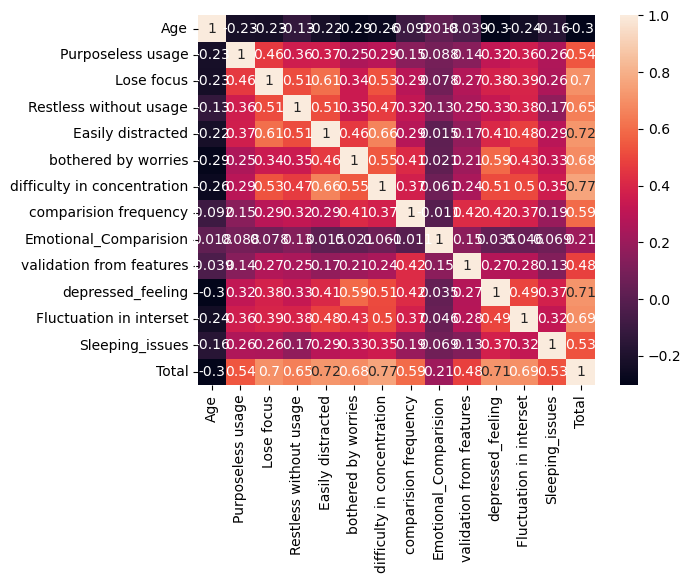

In [14]:
correlation_matrix = survey.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True)

In [15]:
# app_counts = survey['Apps used'].value_counts()
# app_counts.plot(kind='bar')

In [16]:
#survey['Total'].value_counts().plot(kind = 'line')

In [17]:
#survey['Time spend'].value_counts().plot(kind = 'pie')

In [18]:
#survey['Relationship Status'].value_counts().plot(kind = 'pie' , ylabel = 'Status')

In [19]:
#survey['Gender'].value_counts().plot(kind = 'pie' , ylabel = 'Gender')

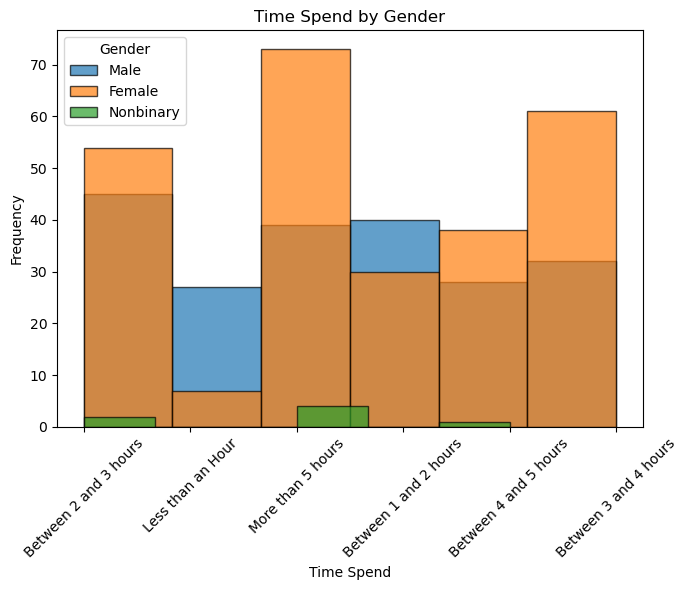

In [20]:
# # Histogram with time spend v/s gender
# survey['Time spend'] = survey['Time spend'].replace({
#     'Between 2 and 3 hours': '2-3 hrs',
#     'Between 4 and 5 hours': '4-5 hrs',
#     'More than 5 hours': '> 5 hrs',
#     'Less than an Hour': '< 1 hr',
#     'Between 3 and 4 hours': '3-4 hrs',
#     'Between 1 and 2 hours': '1-2 hrs'
# })

# Histogram for Time Spend grouped by Gender
plt.figure(figsize=(7, 6))

# Loop through each unique value in Gender
for gender in survey['Gender'].unique():
    plt.hist(
        survey[survey['Gender'] == gender]['Time spend'], 
        bins=len(survey['Time spend'].unique()), 
        alpha=0.7, 
        label=gender, 
        edgecolor='black'
    )

# Add plot details
plt.title('Time Spend by Gender')
plt.xlabel('Time Spend')
plt.ylabel('Frequency')
plt.legend(title='Gender')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
#survey['Apps used'].value_counts().plot(kind = 'line')

In [25]:
# Plot: Age vs. Purposeless Usage
# plt.figure(figsize=(10, 5))
# plt.scatter(df_cleaned['Age'], df_cleaned['Purposeless usage'], color='blue', alpha=0.6, label='Purposeless Usage')
# plt.title('Age vs. Purposeless Usage')
# plt.xlabel('Age')
# plt.ylabel('Purposeless Usage')
# plt.grid(True)
# plt.show()

# Plot: Age vs. sleeping issue
# plt.figure(figsize=(10, 5))
# plt.scatter(df_cleaned['Age'], df_cleaned['Sleeping_issues'], color='purple', alpha=0.6, label='Sleeping issues')
# plt.title('Age vs. Sleeping_issues')
# plt.xlabel('Age')
# plt.ylabel('Sleeping issues')
# plt.grid(True)
# plt.show()

# Data Preprocessing

## Cleaning Data

In [26]:
survey.isna().sum()

Age                             0
Gender                          0
Relationship Status             0
Occupation Status               0
Occupation Status.1            30
Social Media usage              0
Apps used                       0
Time spend                      0
Purposeless usage               0
Lose focus                      0
Restless without usage          0
Easily distracted               0
bothered by worries             0
difficulty in concentration     0
comparision frequency           0
Emotional_Comparision           0
validation from features        0
depressed_feeling               0
Fluctuation in interset         0
Sleeping_issues                 0
Total                           0
dtype: int64

In [27]:
#survey.info()

In [28]:
survey.dropna()

,Age,Gender,Relationship Status,Occupation Status,Occupation Status.1,Social Media usage,Apps used,Time spend,Purposeless usage,Lose focus,...,Easily distracted,bothered by worries,difficulty in concentration,comparision frequency,Emotional_Comparision,validation from features,depressed_feeling,Fluctuation in interset,Sleeping_issues,Total
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,...,4,3,4,4,2,4,3,4,4,42
477,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,...,3,4,4,4,2,4,4,4,1,35
478,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,...,3,2,3,3,3,4,2,2,2,34
479,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,...,3,3,2,2,3,4,4,5,4,37


In [29]:
survey.dropna(inplace=True)
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          451 non-null    float64
 1   Gender                       451 non-null    object 
 2   Relationship Status          451 non-null    object 
 3   Occupation Status            451 non-null    object 
 4   Occupation Status.1          451 non-null    object 
 5   Social Media usage           451 non-null    object 
 6   Apps used                    451 non-null    object 
 7   Time spend                   451 non-null    object 
 8   Purposeless usage            451 non-null    int64  
 9   Lose focus                   451 non-null    int64  
 10  Restless without usage       451 non-null    int64  
 11  Easily distracted            451 non-null    int64  
 12  bothered by worries          451 non-null    int64  
 13  difficulty in concentrati

In [30]:
#survey

## Handling duplicate data

In [31]:
survey.duplicated().sum()

np.int64(0)

In [32]:
# This function will return true when there is a duplicate value
#survey.duplicated()

In [33]:
survey.drop_duplicates()

,Age,Gender,Relationship Status,Occupation Status,Occupation Status.1,Social Media usage,Apps used,Time spend,Purposeless usage,Lose focus,...,Easily distracted,bothered by worries,difficulty in concentration,comparision frequency,Emotional_Comparision,validation from features,depressed_feeling,Fluctuation in interset,Sleeping_issues,Total
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,...,4,3,4,4,2,4,3,4,4,42
477,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,...,3,4,4,4,2,4,4,4,1,35
478,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,...,3,2,3,3,3,4,2,2,2,34
479,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,...,3,3,2,2,3,4,4,5,4,37


In [34]:
survey.drop_duplicates(inplace=True)
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          451 non-null    float64
 1   Gender                       451 non-null    object 
 2   Relationship Status          451 non-null    object 
 3   Occupation Status            451 non-null    object 
 4   Occupation Status.1          451 non-null    object 
 5   Social Media usage           451 non-null    object 
 6   Apps used                    451 non-null    object 
 7   Time spend                   451 non-null    object 
 8   Purposeless usage            451 non-null    int64  
 9   Lose focus                   451 non-null    int64  
 10  Restless without usage       451 non-null    int64  
 11  Easily distracted            451 non-null    int64  
 12  bothered by worries          451 non-null    int64  
 13  difficulty in concentrati

## Feature Scaling (Normalization) MinMax Scaling

Feature  scaling wasn't needed becasue all the features are alredy adjusted

In [35]:
# #scalling the columns
# features = survey.select_dtypes(include=['int64', 'float64']).columns
# print(features)

In [36]:
# Numeric_data = ['Age', 'Purposeless usage', 'Lose focus', 'Restless without usage',
#        'Easily distracted', 'bothered by worries',
#        'difficulty in concentration', 'comparision frequency',
#        'Emotional Comparision', 'validation from features',
#        'depressed feeling', 'Fluctuation in interset',
#        'Total']

In [37]:
# #for predicting numerical value difference for scalling
# for column in Numeric_data:
#     column_range = survey[column].max() - survey[column].min()
#     print(f"Range of '{column}': {column_range}")

In [38]:
# Feature_to_scale = ['Age', 'Purposeless usage', 'Lose focus', 'Restless without usage',
#        'Easily distracted', 'bothered by worries',
#        'difficulty in concentration', 'comparision frequency',
#        'Emotional Comparision', 'validation from features',
#        'depressed feeling', 'Fluctuation in interset',
#        'Total']

In [39]:
# #using minmax scalling feature
# scaler = MinMaxScaler()
# dataset =  pd.DataFrame(scaler.fit_transform(survey[Feature_to_scale]), columns=Feature_to_scale)
# # dataset

In [40]:
# printing original dataset
#survey[Feature_to_scale]

In [41]:
# # update the original dataset with the scaled values (Min-Max/Standard)
# survey[Feature_to_scale] = dataset
# print("\nUpdated Dataset:")
# survey[Feature_to_scale]

In [42]:
# printing the original dataset
#survey

## Encoding Catagorical Variables

In [43]:
#identify string datatypes
# alphabetic_data = survey.select_dtypes(include=['object']).columns
# print(alphabetic_data)

In [44]:
# Convert Timestamp to datetime
# survey['Timestamp'] = pd.to_datetime(survey['Timestamp'], errors='coerce')
# survey.info()

In [45]:
#identify string datatypes
alphabetic_data = survey.select_dtypes(include=['object']).columns
print(alphabetic_data)

Index(['Gender', 'Relationship Status', 'Occupation Status',
       'Occupation Status.1', 'Social Media usage', 'Apps used', 'Time spend'],
      dtype='object')


In [46]:
#survey.columns

In [47]:
# Label Encoding 'Social media usgae ' column
label_encoder = LabelEncoder()
survey['SM usage_encoded'] = label_encoder.fit_transform(survey['Social Media usage'])
survey[['Social Media usage', 'SM usage_encoded']]

,Social Media usage,SM usage_encoded
0,Yes,1
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1
...,...,...
476,Yes,1
477,Yes,1
478,Yes,1
479,Yes,1


In [48]:
# survey.columns

## One Hot Encoding

In [49]:
Survey = pd.get_dummies(survey, columns=['Gender', 'Relationship Status' ,'Apps used','Time spend', 'Occupation Status'])
#Survey

In [50]:
alphabetic_data

Index(['Gender', 'Relationship Status', 'Occupation Status',
       'Occupation Status.1', 'Social Media usage', 'Apps used', 'Time spend'],
      dtype='object')

In [51]:
columns_to_drop = ['Affilation']
survey = survey.drop(columns=columns_to_drop, errors='ignore')
survey

,Age,Gender,Relationship Status,Occupation Status,Occupation Status.1,Social Media usage,Apps used,Time spend,Purposeless usage,Lose focus,...,bothered by worries,difficulty in concentration,comparision frequency,Emotional_Comparision,validation from features,depressed_feeling,Fluctuation in interset,Sleeping_issues,Total,SM usage_encoded
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,2,5,2,3,2,5,4,5,43,1
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,5,4,5,1,1,5,4,5,43,1
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,5,4,3,3,1,4,2,5,35,1
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,5,3,5,1,2,4,3,2,35,1
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,5,5,3,3,3,4,4,1,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,...,3,4,4,2,4,3,4,4,42,1
477,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,...,4,4,4,2,4,4,4,1,35,1
478,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,...,2,3,3,3,4,2,2,2,34,1
479,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,...,3,2,2,3,4,4,5,4,37,1


In [52]:
time_spend_mapping = {
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
}
survey['Time_Spend_Numeric'] = survey['Time spend'].map(time_spend_mapping)


# Display the updated DataFrame with the new column
print(survey[['Time spend', 'Time_Spend_Numeric']].head())


              Time spend  Time_Spend_Numeric
0  Between 2 and 3 hours                   2
1      More than 5 hours                   5
2  Between 3 and 4 hours                   3
3      More than 5 hours                   5
4  Between 2 and 3 hours                   2


In [53]:
Gender_mapping = {
    'Male': 2,
    'Female': 1,
    'Nonbinary': 0,
    
}
survey['Gender_Numeric'] = survey['Gender'].map(Gender_mapping)


# Display the updated DataFrame with the new column
print(survey[['Gender', 'Gender_Numeric']].tail())


     Gender  Gender_Numeric
476    Male               2
477  Female               1
478  Female               1
479    Male               2
480    Male               2


In [54]:
survey['Relationship Status'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [55]:
print(X.isnull().sum())

NameError: name 'X' is not defined

In [56]:
X = X.dropna()  # Drops rows with NaN values
X

NameError: name 'X' is not defined

In [57]:
y=y.dropna()
y

NameError: name 'y' is not defined

In [ ]:
print(pd.DataFrame(X).isnull().sum())

In [ ]:
survey.columns

# Training the logistic regression model

In [58]:
from sklearn.model_selection import train_test_split # Training
from sklearn.linear_model import LogisticRegression #training
from sklearn.metrics import accuracy_score #evaluation

# Define features (X) and target (y)
X = survey[['Age','Time_Spend_Numeric','Sleeping_issues','Emotional_Comparision']]  # Features
y = survey['depressed_feeling']  # Target variable
# Now X is the feature matrix and y is the target array

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [59]:
X_train = X_train.dropna()
X_train.isnull().sum()

Age                      0
Time_Spend_Numeric       0
Sleeping_issues          0
Emotional_Comparision    0
dtype: int64

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 438 to 113
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    315 non-null    float64
 1   Time_Spend_Numeric     315 non-null    int64  
 2   Sleeping_issues        315 non-null    int64  
 3   Emotional_Comparision  315 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.3 KB


In [61]:
y_train = y_train.dropna()
y_train.info()

<class 'pandas.core.series.Series'>
Index: 315 entries, 438 to 113
Series name: depressed_feeling
Non-Null Count  Dtype
--------------  -----
315 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [62]:
# Step 4: Model Selection - Using Logistic Regression
model = LogisticRegression(max_iter=200)
y

0      5
1      5
2      4
3      4
4      4
      ..
476    3
477    4
478    2
479    4
480    2
Name: depressed_feeling, Length: 451, dtype: int64

In [63]:
# Step 5: Training the Model
model.fit(X_train, y_train)

C:\Users\freel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [67]:
# Step 7: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model on Survey dataset:", accuracy)

Accuracy of the Logistic Regression model on Survey dataset: 0.3014705882352941


In [65]:
y_train.unique()

array([2, 4, 5, 1, 3])

In [66]:
# Step 6: Making Predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [68]:
# Based on user input, predict their range of sleeping issues
print("THe range of 1-5 was specified as 1 is the extreme value and 5 is the lowest of the value")

# Input features
Age = int(input("Enter your Age :  "))
Time_Spend  = int(input("Enter your time spend on social media from range of 1-5 : "))
Sleeping_issue = int(input("Enter your range of difficulty in sleeping from scale of 1-5 : "))
Emotional_Comparision = int(input("Enter your range of emotional comparision with social media from scale of 1-5 : "))
X_new = [[Age, Time_Spend, Sleeping_issue, Emotional_Comparision]]

# Predict the class
predicted_depression_feeling = model.predict(X_new)[0]
predicted_depressionfeeling_range = survey.depressed_feeling [predicted_depression_feeling]

print("Predicted depression chances from scale of 1-5:", predicted_depressionfeeling_range)

THe range of 1-5 was specified as 1 is the extreme value and 5 is the lowest of the value


Enter your Age :   21
Enter your time spend on social media from range of 1-5 :  2
Enter your range of difficulty in sleeping from scale of 1-5 :  3
Enter your range of emotional comparision with social media from scale of 1-5 :  3


Predicted depression chances from scale of 1-5: 4


C:\Users\freel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
